## Description
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

### Variables:
**Hours Studied**: The total number of hours spent studying by each student.

**Previous Scores**: The scores obtained by students in previous tests.

**Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No).

**Sleep Hours**: The average number of hours of sleep the student had per day.

**Sample Question Papers Practiced**: The number of sample question papers the student practiced.

#### Target Variable:

**Performance Index**: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Read dataset

In [101]:
df=pd.read_csv('Student_Performance.csv')
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


###  Encode Categorical Features

In [102]:
df['Extracurricular Activities']=df['Extracurricular Activities'].astype(str).map({'Yes':1, 'No':0})
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


### Define features and target

In [103]:
X_train=df.drop('Performance Index', axis=1).values
y_train=df['Performance Index'].values

### Define number of training example and features

In [104]:
m,n=X_train.shape
print(f"Number of training example m = {m}")
print(f"Number of features n = {n}")

Number of training example m = 10000
Number of features n = 5


### Define cost function

In [105]:
def compute_cost(X,y,w,b):
    cost=0.0

    for i in range(m):
        f_wb_i=np.dot(w,X[i])+b
        cost+=(f_wb_i-y[i])**2
    
    cost/=(2*m)

    return(np.squeeze(cost))

### Compute Gradient

In [106]:
def compute_gradient(X,y,w,b):
    dj_dw=np.zeros((n,))
    dj_db=0

    for i in range(m):
        f_wb_i=np.dot(w,X[i])+b
        err=f_wb_i-y[i]

        for j in range(n):
            dj_dw[j]+=err*X[i,j]
        
        dj_db+=err
    
    dj_dw/=m
    dj_db/=m

    return dj_dw,dj_db

### Gradient descent

In [107]:
import copy

def gradient_descent(X,y,w_in,b_in,alpha,numiters):

    w=copy.deepcopy(w_in)
    b=b_in

    J_hist=[]

    for i in range(numiters):

        dj_dw,dj_db=compute_gradient(X,y,w,b)

        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        if i<10000:
            J_hist.append(compute_cost(X,y,w,b))
        
        if i%(numiters/10)==0:
            print(f"Iteration {i:4d}.  Cost {J_hist[-1]}")

    return w,b,J_hist


### Initialize Parameters

In [108]:
w_in=np.zeros(n)
b_in=0
# 2.587*(1e-4)
alpha=3.5*1e-4
numiters=16000

w,b,J_hist=gradient_descent(X_train,y_train,w_in,b_in,alpha,numiters)

Iteration    0.  Cost 1169.158405246536
Iteration 1600.  Cost 16.741330154701235
Iteration 3200.  Cost 16.199637341615794
Iteration 4800.  Cost 15.771955659144698
Iteration 6400.  Cost 15.364363277141974
Iteration 8000.  Cost 14.973691507734419
Iteration 9600.  Cost 14.598097695465551
Iteration 11200.  Cost 14.506607132866609
Iteration 12800.  Cost 14.506607132866609
Iteration 14400.  Cost 14.506607132866609


### Weight and bias

In [109]:
print(f"Weight: {w} Bias: {b}")

Weight: [ 2.28367248  0.84475621 -0.77481371 -1.24659761 -0.20426561] Bias: -4.625835405722423


### Predict Student Performance

In [110]:
y_predict=np.zeros(m)

for i in range(m):
    y_predict[i]=np.dot(w,X_train[i])+b

### Result Evaluation

In [111]:
compare_df=pd.DataFrame({
    'Actual':y_train,
    'Predicted':y_predict
})

print(compare_df[:20])

    Actual  Predicted
0     91.0  82.792279
1     65.0  68.383942
2     45.0  46.816583
3     36.0  43.303517
4     66.0  63.722479
5     61.0  55.671195
6     63.0  64.793680
7     42.0  44.670776
8     61.0  61.457443
9     69.0  74.705767
10    84.0  84.508641
11    73.0  72.491168
12    27.0  30.300814
13    33.0  43.384820
14    68.0  63.167960
15    43.0  55.164770
16    67.0  63.746091
17    70.0  69.281437
18    30.0  37.958750
19    63.0  61.423060


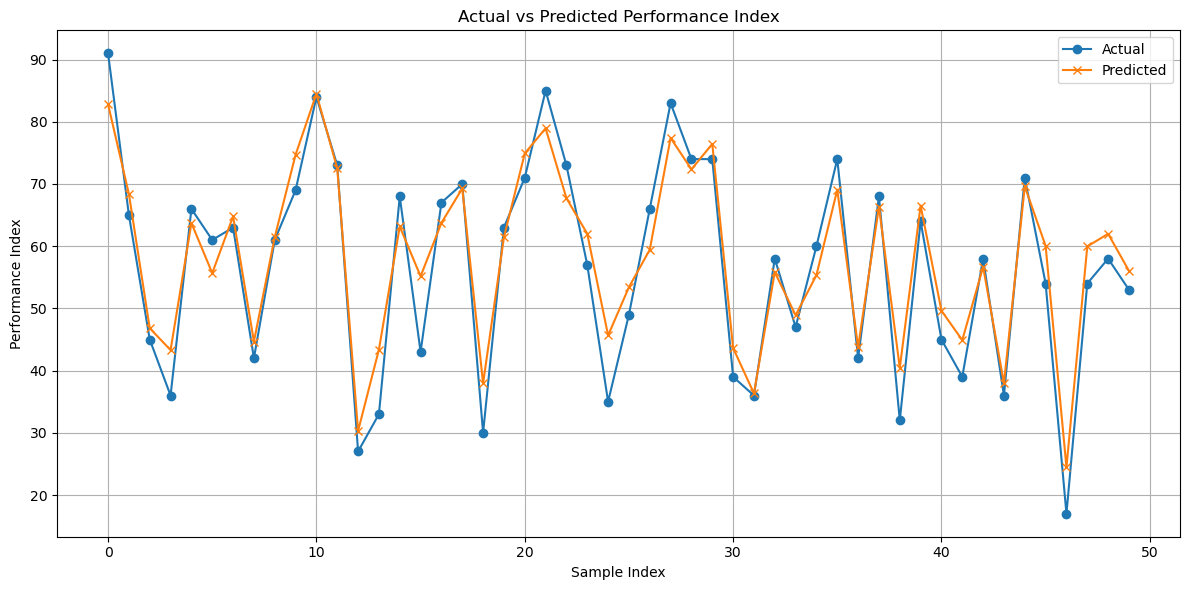

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(y_train[:50], label='Actual', marker='o')
plt.plot(y_predict[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted Performance Index')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Performance metrics for this model

#### R² Score (Coefficient of Determination)

% of variance explained by model (best = 1.0)

$R^2 = 1 - \frac{SSres}{SStot}$

- $SSres = \sum\limits_{i=0}^{m-1} (y^i - \hat{y}^i)^2$ = Residual Sum of Squares (error of your model)
- $SStot = \sum\limits_{i=0}^{m-1} (y^i - \bar{y})^2$ = Total Sum of Squares (error of simply using the mean)
- $y^i$ = Actual value
- $\hat{y}^i$ = Predicted value
- $\bar{y}$ = Mean of actual values
- m = Number of training example

In [113]:
y_target=np.array(y_train)
y_predict=np.array(y_predict)

ymean=np.mean(y_target)

ss_res=np.sum((y_target-y_predict)**2)
ss_tot=np.sum((y_target-ymean)**2)

r2=1-(ss_res/ss_tot)

print(r2)


0.9283534416140078


We can say the model is a good fit

#### RMSE: Root Mean Squared Error
$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=0}^{m-1} (y_i - \hat{y}_i)^2 }
$$

Where:
- $y^i$ = actual value  
- $\hat{y}^i$ = predicted value  
- m = number of samples

In [114]:
sum_of_sq_error=np.sum((y_target-y_predict)**2)
mean_sq_error=sum_of_sq_error/m

rmse=np.sqrt(mean_sq_error)

print(rmse)

5.142344145881111


#### MAE (Mean Absolute Error)

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$


In [115]:
sum_of_abs_error=np.sum(np.abs(y_target-y_predict))

mae=sum_of_abs_error/m

print(mae)

4.143888655964783


In [116]:
rng=max(y_target)-min(y_target)
print(f"The range width is {rng}")

The range width is 90.0


The range width is 90 (100 - 10).

MAE (4.14) → on average, the predictions are off by about 4.6% of the range.

RMSE (5.14) → penalizing larger errors, the average error is about 5.7% of the range.

Both errors are relatively small compared to the range.

The Model is Fairly Accurate.

**Improve RMSE and MAE**: Feature scaling and feature engineering might help.